# Prosper Loan Data Exploration
## By King Solomon Otoo

## Investigation Overview

Investigating, 
- The number of loans completed and those defaulted and their respective percetages.
- Employment Status that acquires more loans.
- Relatsionship between Loan Status counts and Prosper Rating.
- Which Prosper rating has the most defaulted thus strengthened the factors that drive default loan.



## Dataset Overview

This data set contains 113937 loans with 81 variables on each loan, for the purpose of this investigation I've taken the following variables: Term, LoanStatus, BorrowerRate, ProsperRating (Alpha), ListingCategory (numeric), EmploymentStatus, DelinquenciesLast7Years, StatedMonthlyIncome, TotalProsperLoans, LoanOriginalAmount, LoanOriginationDate, Recommendations, Investors.

In [1]:
# import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Loading the dataset
loan_df = pd.read_csv('prosperLoanData.csv')
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# list containin column names of interest
subloandf_cols =  ['BorrowerRate', 'Term', 'Recommendations', 'ProsperRating (Alpha)', 'TotalProsperLoans', 'EmploymentStatus', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'ListingCategory (numeric)',
    'LoanOriginationDate','LoanStatus', 'Investors', 'DelinquenciesLast7Years']

# dataframe containing only the columns of interest
subloandf = loan_df[subloandf_cols]

# formatting the date column to proper date format
subloandf['LoanOriginationDate'] = pd.to_datetime(subloandf['LoanOriginationDate'])
# removing all null values based on 'ProsperRating (Alpha)'
subloandf= subloandf.dropna(subset=['ProsperRating (Alpha)'])
#  resetting the dataframe
subloandf = subloandf.reset_index()
# filling all null values inthe 'TotalProsperLoans' columnn with zeros 
subloandf['TotalProsperLoans'] = subloandf['TotalProsperLoans'].fillna(0)

# choosing values which are defaulted or completed  
comp_or_def = (subloandf['LoanStatus'] == 'Completed') | (subloandf['LoanStatus'] == 'Defaulted') | (subloandf['LoanStatus'] == 'Chargedoff')
# creating the datafrane which the conditon
defaulted_df = subloandf[comp_or_def]

def defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
defaulted_df['LoanStatus'] = defaulted_df.apply(defaulted, axis=1)


## Number of loans completed versus number of loans defaulted and their resective percetages

- Completed loans contributed the majority of the borrowers loans that is 19664 and defaulted loans were 6341. For proportion-wise about 76% were completed, while about 24% were defaulted by borrowers.

In [4]:
# function to display text on charts
def chart_label(df, variable, chart_type):
    val_counts = df[variable].value_counts()
    # Logic to print the proportion text on the bar
    for i in range (val_counts.shape[0]):
        # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
        count = val_counts[i]
        # Convert count into a percentage, and then into string
        pct_string = '{}'.format(count)
        # Print the string value on the bar. 
        # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
        if chart_type == 'h':
            plt.text(count+100, i, pct_string, va='center')
        elif chart_type == 'v':
            plt.text(i, count+100, pct_string, ha='center') 

In [9]:
# Defining a function for chart labels to avoid code repetition
def chart_labels(xlab, ylab, title):
    plt.title(title, fontsize=15, fontweight='semibold')
    plt.xlabel(xlab, fontsize=13, fontweight='semibold')
    plt.ylabel(ylab, fontsize=13, fontweight='semibold'); 

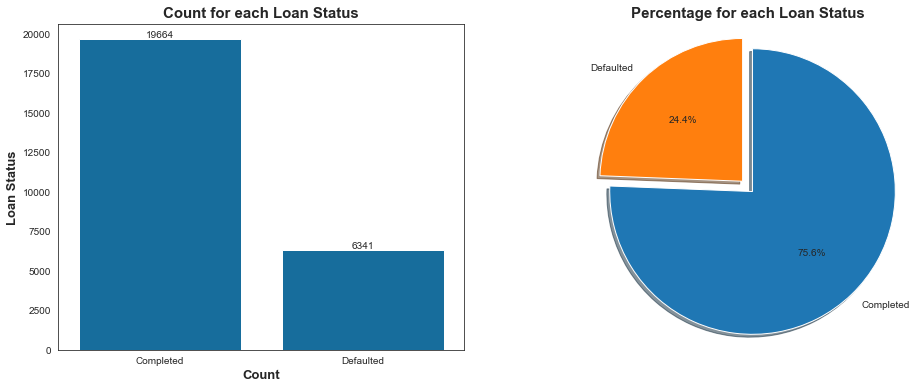

In [5]:
# increasing the chart
plt.figure(figsize=[16, 6]);
# setting the color using the colorblind palette
base_color = sb.color_palette('colorblind')[0]
# changin the chart background color
sb.set_style('white')


loan_counts = defaulted_df['LoanStatus'].value_counts()
loan_order = loan_counts.index

plt.subplot(1, 2, 1);
ax = sb.countplot(data=defaulted_df, x='LoanStatus', color=base_color, order=loan_order);
plt.title('Count for each Loan Status', fontsize=15, fontweight='semibold')
plt.xlabel('Count', fontsize=13, fontweight='semibold');
plt.ylabel('Loan Status', fontsize=13, fontweight='semibold');
chart_label(defaulted_df,'LoanStatus', 'v')

plt.subplot(1, 2, 2);
sorted_vals = loan_counts/defaulted_df.shape[0];
plt.pie(sorted_vals, explode=[0, 0.1], labels=sorted_vals.index, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True);
plt.axis('square');
plt.title('Percentage for each Loan Status', fontsize=15, fontweight='semibold');

## Employment Status that acquires more loans.
Borrowers having the 'Employed' status accounted for borrowers with most loans that is 67310 and followed by 'Full-time' status having 7927

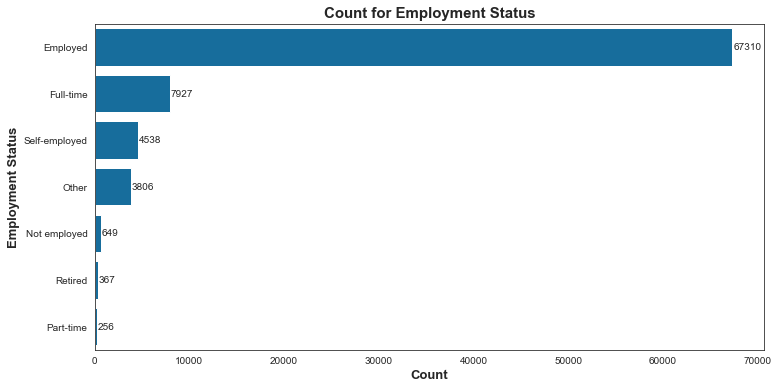

In [6]:
type_counts = subloandf['EmploymentStatus'].value_counts()
type_order = type_counts.index

plt.figure(figsize=[12, 6]);
sb.countplot(data = subloandf, y = 'EmploymentStatus', color = base_color, order=type_order, );
plt.title('Count for Employment Status',fontsize=15, fontweight='semibold' );
plt.xlabel('Count', fontsize=13, fontweight='semibold');
plt.ylabel('Employment Status', fontsize=13, fontweight='semibold');
chart_label(subloandf,'EmploymentStatus', 'h')

## Relationship between Loan Status counts  and Prosper Rating'

The most frequent rating among defaulted loans is actually `D` and also the most frequent rating among Completed is also `D`.
The Prosper Rating `AA` too accounted the least rating among both defaulted and completed loans.

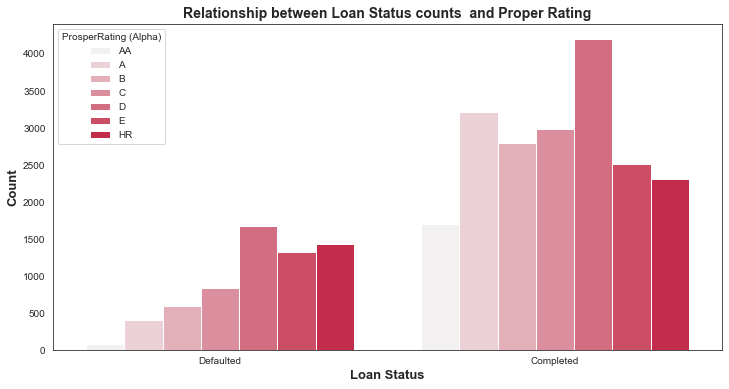

In [7]:
plt.figure(figsize=[12, 6]);
sb.countplot(data = defaulted_df, x ='LoanStatus', hue = 'ProsperRating (Alpha)', color='crimson',
             hue_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']);
plt.title('Relationship between Loan Status counts  and Proper Rating',fontsize=14, fontweight='semibold' );
plt.xlabel('Loan Status', fontsize=13, fontweight='semibold');
plt.ylabel('Count', fontsize=13, fontweight='semibold');

## Average Loan Amount varing in term of  Proper rating for each Loan Status

The average loan amount for defaulted loan status tends to larger than that of completed in term of Prosper Ratings and 
most of the defaulted comes from borrwers with Prosper rating `AA`.


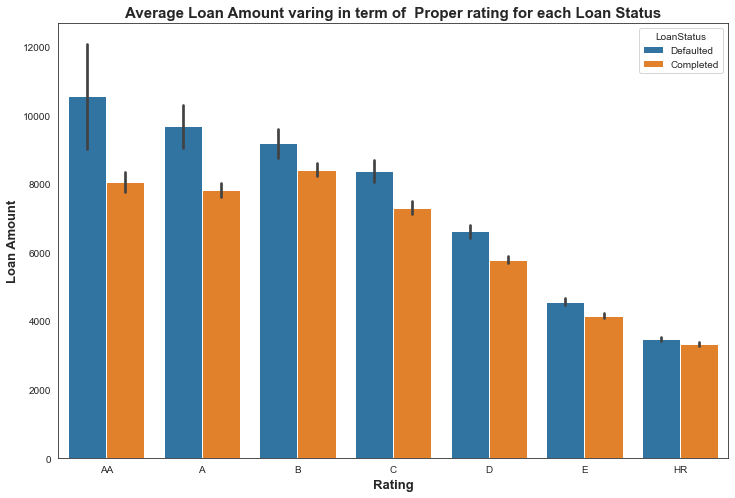

In [8]:
plt.figure(figsize = [12, 8])
sb.barplot(data=defaulted_df, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus',
           order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']);
plt.title('Average Loan Amount varing in term of  Proper rating for each Loan Status',
        fontsize=15, fontweight='semibold' );
plt.xlabel('Rating', fontsize=13, fontweight='semibold');
plt.ylabel('Loan Amount', fontsize=13, fontweight='semibold');